<a href="https://colab.research.google.com/github/amratallah123/PatternRecognation/blob/master/pattern_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt             
import seaborn as sn
import pandas as pd

In [ ]:
top_words=5000
input_length= 500
(X_train,y_train),(X_test, y_test)= imdb.load_data(num_words=top_words)






17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# Convert movie review data to feature matrix
X_train =  sequence.pad_sequences(X_train,maxlen=input_length)
print(); print(X_train.shape); print(X_train)

X_test =  sequence.pad_sequences(X_test,maxlen=input_length)


(25000, 500)
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [ ]:


# setup a CNN network
model = Sequential()
model.add(Embedding(top_words,32,input_length=input_length))
model.add(Conv1D(filters=32,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [ ]:
history= model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=20,batch_size=128)


Epoch 1/20
196/196 [==============================] - 22s 108ms/step - loss: 0.6186 - accuracy: 0.6561 - val_loss: 0.4786 - val_accuracy: 0.8635
Epoch 2/20
196/196 [==============================] - 21s 107ms/step - loss: 0.4237 - accuracy: 0.8883 - val_loss: 0.4202 - val_accuracy: 0.8827
Epoch 3/20
196/196 [==============================] - 20s 105ms/step - loss: 0.3472 - accuracy: 0.9200 - val_loss: 0.4029 - val_accuracy: 0.8810
Epoch 4/20
196/196 [==============================] - 21s 105ms/step - loss: 0.2962 - accuracy: 0.9366 - val_loss: 0.3895 - val_accuracy: 0.8790
Epoch 5/20
196/196 [==============================] - 21s 105ms/step - loss: 0.2581 - accuracy: 0.9472 - val_loss: 0.3961 - val_accuracy: 0.8763
Epoch 6/20
196/196 [==============================] - 21s 105ms/step - loss: 0.2262 - accuracy: 0.9558 - val_loss: 0.4017 - val_accuracy: 0.8741
Epoch 7/20
196/196 [==============================] - 21s 107ms/step - loss: 0.1968 - accuracy: 0.9629 - val_loss: 0.4044 - val_ac

In [ ]:
# final evaluation of the model
scores = model.evaluate(X_test,y_test,verbose=1)


782/782 [==============================] - 6s 8ms/step - loss: 0.6302 - accuracy: 0.8676


In [ ]:

prediction = model.predict(X_test)

In [ ]:
import numpy as np
prediction = np.asarray(prediction).reshape(1, -1)[0,:]
print(prediction[:10])

[0.07402909 1.         0.9984274  0.07402909 1.         0.99375594
 1.         0.07402909 1.         1.        ]


In [ ]:
print(y_test[:10])

[0 1 1 0 1 1 1 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'good','bad')), categories = ['good','bad'])
prediction1 = pd.Categorical(list(np.where(np.array(prediction) == 1, 'good','bad')), categories = ['good','bad'])

[[12348   152]
 [ 6898  5602]]


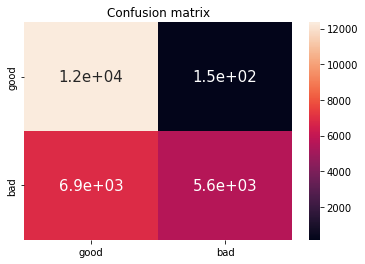

In [ ]:
CM = confusion_matrix(true, prediction1)
print(CM)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 15}, 
           xticklabels=['good','bad'], 
           yticklabels=['good','bad'], ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

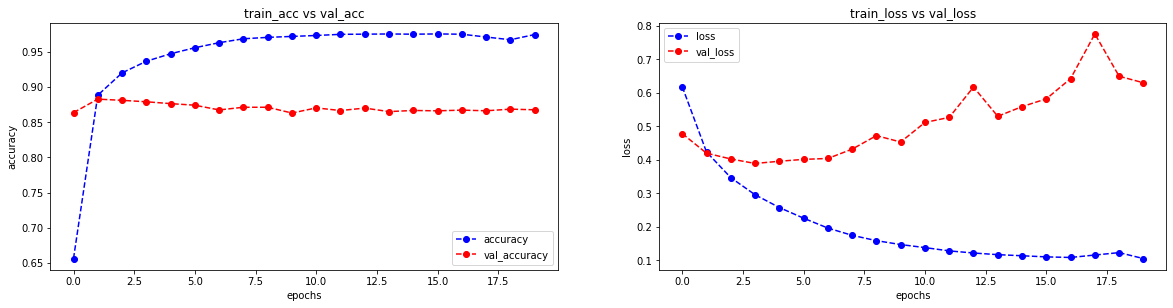

In [ ]:
plot_accuracy_loss(history)
